In [104]:
%matplotlib inline
import numpy as np
from qiskit import *
#from qiskit.visualization import *
#from qiskit.extensions import *
#from qiskit_textbook.tools import *
import math
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-02 00:56:21,871: Credentials are already in use. The existing account in the session will be replaced.


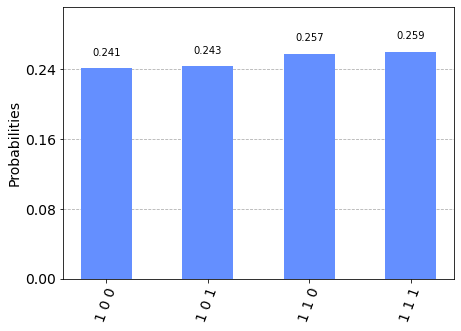

In [109]:
def simulate(circuit): # this is a helper function for simulating and displaying a histogram
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(circuit, backend, shots=1000).result().get_counts()
    return plot_histogram(counts)

def bell_pair(circuit, q0, q1): # entangles qubits, this is a supplementary function
    circuit.h(q0) 
    circuit.cx(q0, q1) 

cr1 = ClassicalRegister(1, name = "classicalBit1") # Classical bit 1
cr2 = ClassicalRegister(1, name = "classicalBit2") # Classical bit 2
c_result = ClassicalRegister(1, name = "teleportedState") # Classical result

qubit0 = QuantumRegister(1, name = "psi") # The quantum state we want to send
qubit1 = QuantumRegister(1, name = "a") # Alice's qubit
qubit2 = QuantumRegister(1, name = "b") # Bob's qubit

circuit = QuantumCircuit(qubit0, qubit1, qubit2, cr1, cr2, c_result) # Creating our circuit

psi = [0, 1] # We want to send |1> to Bob
circuit.initialize(psi, qubit0) # Set the quantum state to Psi

circuit.h(qubit1) # Apply Hadamard to Alice's qubit
circuit.cnot(qubit1, qubit2) # Perform CNOT with Alice's qubit as the control, and Bob's qubit as the target
circuit.barrier() # Separate our gates so we can see the circuit better
circuit.cnot(qubit0, qubit1) # Perform CNOT with Psi as the control, and Alice's qubit as the target
circuit.h(qubit0) # Apply Hadamard to Psi
circuit.barrier() # Once again, separate our gates so we can see the circuit better

circuit.measure(qubit0, cr1) # Alice measures Psi to our first classical bit
circuit.measure(qubit1, cr2) # Alice measures her qubit to our second classical bit

circuit.z(qubit2).c_if(cr1, 1) # Apply Z-gate if the first classical bit is 1
circuit.x(qubit2).c_if(cr2, 1) # Apply X-gate if the second classical bit is 1

circuit.measure(qubit2, c_result) # Measure Bob's qubit to c_result

simulate(circuit)
